In [4]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN


In [5]:
data = pd.read_csv('tel_churn.csv')
data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [6]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [7]:
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
#make a copy of data
df = data.copy()

In [9]:
#create x and y variables
x = df.drop('Churn', axis=1)
y = df['Churn']

In [12]:
#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Modelling (Decission Tree Classifier)

In [15]:
#using decision tree classifier
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42)   

#fit the model
dtc.fit(x_train, y_train)

#make predictions
y_pred = dtc.predict(x_test)
print(classification_report(y_test, y_pred))

#calculate ROC AUC score
y_pred_proba = dtc.predict_proba(x_test)[:,1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))    


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1033
           1       0.46      0.48      0.47       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407

ROC AUC Score: 0.639574522055588


Data is imbalanced and the ROC AUC Score is low, will balance the data before running my model again

BALANCING THE DATA

In [15]:
sm1 = SMOTEENN()
#resampled entire data and split again
x_resampled, y_resampled = sm1.fit_resample(x, y)    
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2) 

#fit the model on resampled data
dtc_resampled = DecisionTreeClassifier(criterion= 'gini', random_state=100, max_depth=6, min_samples_leaf=8)
dtc_resampled.fit(xr_train, yr_train)

#make predictions on resampled test data
y_pred_resampled = dtc_resampled.predict(xr_test)
print(classification_report(yr_test, y_pred_resampled))




              precision    recall  f1-score   support

           0       0.94      0.92      0.93       529
           1       0.94      0.95      0.94       631

    accuracy                           0.94      1160
   macro avg       0.94      0.94      0.94      1160
weighted avg       0.94      0.94      0.94      1160



In [ ]:
#USING RANDOM FOREST CLASSIFIER
sm1 = SMOTEENN()
#resampled entire data and split again
x_resampled, y_resampled = sm1.fit_resample(x, y)    
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.2) 

#fit the model on resampled data using random forest    
rfc_resampled = RandomForestClassifier(criterion= 'gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc_resampled.fit(xr_train, yr_train)   

#make predictions on resampled test data
y_pred_resampled = dtc_resampled.predict(xr_test)
print(classification_report(yr_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       554
           1       0.93      0.95      0.94       621

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



In [23]:
#Save the random forest model
import pickle
filename = 'rfc_churn_model.pkl'
pickle.dump(rfc_resampled, open(filename, 'wb'))

In [24]:
#load mpdel
load_model = pickle.load(open('rfc_churn_model.pkl', 'rb'))

In [25]:
load_model.score(x_test, y_test)

0.7228144989339019

BEST PRACTICE

In [ ]:
#Resample ONLY training data

#Split first
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

#Resample ONLY training data
sm = SMOTEENN()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

#Train model
dtc = DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)
dtc.fit(x_train_res, y_train_res)

#Predict on ORIGINAL test data
y_pred = dtc.predict(x_test)

#Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1033
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



USING RANDOM FOREST CLASSIFIER

In [14]:
#USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

#Split first
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

#Resample ONLY training data
sm = SMOTEENN()
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

#Train model
rfc = RandomForestClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
rfc.fit(x_train_res, y_train_res)

#Predict on ORIGINAL test data
y_pred = rfc.predict(x_test)

#Evaluate
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



TRYING XGB WITH HYPERPARAMETERS

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1033
           1       0.53      0.69      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.76      0.77      1407

ROC AUC Score: 0.817


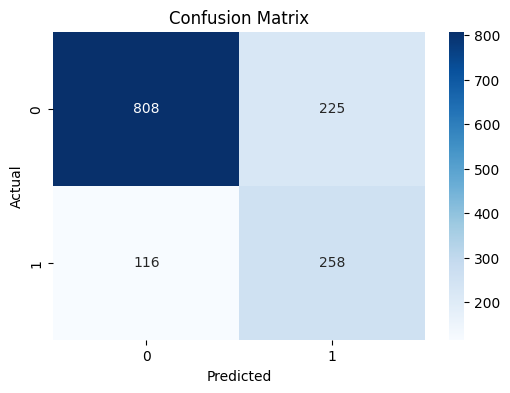

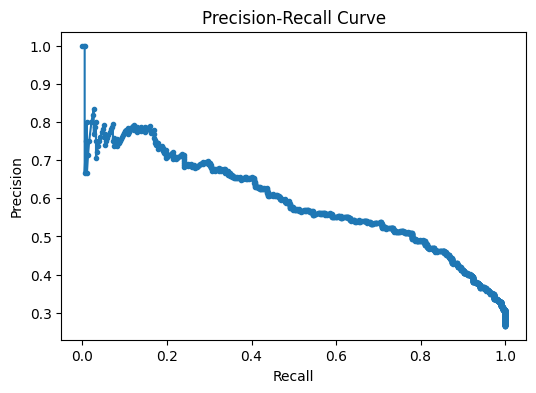

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Resample training data
sm = SMOTEENN(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# Train XGBoost with basic hyperparameters
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(x_train_res, y_train_res)

# Predict probabilities on real test data
y_proba = xgb.predict_proba(x_test)[:,1]

#Threshold tuning for recall/precision balance
threshold = 0.4  # lower threshold → higher recall
y_pred = (y_proba > threshold).astype(int)

# Evaluate
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [ ]:
#SAVE MODEL
import pickle
filename = 'xgb_churn_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [19]:
#load the model
loaded_model = pickle.load(open('xgb_churn_model.pkl', 'rb'))



In [20]:
loaded_model.score(x_test, y_test)

0.759772565742715